<a href="https://colab.research.google.com/github/xoyeon/hongong-mldl/blob/main/02_1_%7C_%ED%9B%88%EB%A0%A8_%EC%84%B8%ED%8A%B8%EC%99%80_%ED%85%8C%EC%8A%A4%ED%8A%B8_%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신러닝 알고리즘
- 지도 학습(supervised learning)
  * 데이터 : 입력(input)
  * 정답 : 타깃(target)
  
  => 훈련 데이터(training data)

- 비지도 학습(unsupervised learning)

# 훈련 세트와 테스트 세트

- 평가에 사용하는 데이터를 테스트 세트
- 훈련에 사용하는 데이터를 훈련 세트

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
#  fish_length와  fish_weight을 하나의 리스트로 담은 2차원 리스트
fish_data = fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

하나의 생선 데이터는 sample   
특성은 길이와 무게   
훈련세트는 이 데이터의 처음 35개   
테스트 세트는 나머지 14개   

In [3]:
# KNeighborsClassifier 클래스 임포트 및 모델 객체 생성
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [4]:
# index를 지정하여 fish의 다섯 번째 샘플 출력
print(fish_data[4])

[29.0, 430.0]


In [5]:
# slicing(:)을 사용하여 인덱스의 범위 지정, 원소를 여러개 선택
print(fish_data[0:5])  ## 첫 번째부터 다섯 번째까지의 샘플 선택

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [6]:
# 마지막 인덱스의 원소는 포함되지 않음
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [7]:
# 마지막 원소까지 포함할 경우 두 번째 인덱스 생략
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [8]:
# 인덱스 0~34까지 처음 35개 샘플을 훈련 세트로 선택
## 훈련 세트로 입력값 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]

## 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]

In [9]:
# 인덱스 35~48까지 나머지 14개 샘플을 테스트 세트로 선택
## 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]

##  테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [10]:
# 모델을 훈련하고, 평가하기
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

훈련 세트와 테스트 세트에 새믈이 골고루 섞여 있지 않으면 **샘플링 편향(sampling bias)**이 발생

# 넘파이(numpy)
- 고차원의 배열을 손쉽게 만들고 조작할 수있는 간편한 도구 제공

In [11]:
import numpy as np

In [12]:
# 파이썬 리스트를 넘파이 배열로 바꾸기
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [13]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [14]:
# 넘파이 배열 객체는 배열의 크기를 알려주는 shape 속성을 제공
print(input_arr.shape)

(49, 2)


In [15]:
# 랜덤하게 무작위로 샘플을 고르기
np.random.seed(42)  ## 일정한 결과를 얻으려면 초기에 랜덤시드(random seed)를 지정
index = np.arange(49) ## arange() 함수에 정수 N을 전달하면 0에서부터 N-1까지 1씩 증가하는 배열을 만듦
np.random.shuffle(index) ## shuffle() 함수는 주어진 배열을 무작위로 섞음

In [16]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [17]:
# 배열 인덱싱(array indexing)은 1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 개의 원소를 선택
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [18]:
# 랜덤하게 35개의 샘플을 훈련 세트로 만들기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [19]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [20]:
# 나머지 14개를 테스트 세트로 만들기
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

AttributeError: ignored

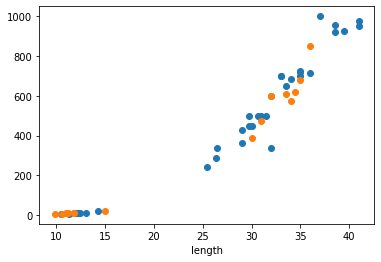

In [21]:
# 훈련 센트와 테스트 세트를 산점도로 그리기
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])  ## 2차원 배열은 행과 열 인덱스를 콤마(,)로 나누어 지정
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylable('weight')
plt.show()

# 두 번째 머신러닝 프로그램

In [23]:
#  앞서 만든 훈련 세트와 테스트 세트로 k-최근접 이웃 모델 훈련시키기
kn = kn.fit(train_input, train_target)

In [24]:
#  모델 테스트
kn.score(test_input, test_target)

1.0

In [25]:
# 테스트 세트의 예측 결과와 실제 타깃 확인
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [26]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])